 # Flight Analysis

Part 2 A

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the cleaned dataset.
df = pd.read_csv('C:\\Users\\bhagy\\Programming CourseWork\\Python\\Cleaned_Dataframe_for_Flight_Analysis.csv')

In [3]:
#Viewing the dataset
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,1587,45,13,0,0,0,0,0,0,0
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,1587,27,19,0,0,0,0,0,0,0
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,1587,4,11,0,0,0,0,0,0,0
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,872,16,10,0,0,0,0,0,0,0
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,872,27,12,0,0,0,0,0,0,0


In [4]:
#Removing the column 'Unnamed: 0'
df=df.drop(columns=['Unnamed: 0'])
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,872,27,12,0,0,0,0,0,0,0


In [5]:
#Creating a new column by adding arrival and departure delay times
df['TotalDelayTime']=df.ArrDelay+df.DepDelay
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelayTime
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8.0


In [6]:
#Replacing all the negative values in the columns 'ArrDelay' and 'DepDelay' to 0 for analytical purposes.
df['TotalDelayTime'] = df['TotalDelayTime'].clip(lower=0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelayTime
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,0.0


In [7]:
def timeperiod (x):
    if x < 400:
        return '00:00-04:00'
    elif x >= 400 and x < 800:
        return '04:00-08:00'
    elif x >= 800 and x < 1200:
        return '08:00-12:00'
    elif x >= 1200 and x < 1600:
        return '12:00-16:00'
    elif x >= 1600 and x < 2000:
        return '16:00-20:00'
    elif x >= 2000 and x < 2400:
        return '20:00-24:00'

#Creating 6 sessions using different time periods of the day in relation to DepTime

In [8]:
#Creating a new column 'Session' for the 6 sessions created.
df['Session']=df['DepTime'].apply(lambda x : timeperiod(x))

In [9]:
#Splitting the dataframe into each year for the application of the question
df_2006 = df[df['Year'] == 2006]
df_2007 = df[df['Year'] == 2007]

In [10]:
#Viewing df_2006
df_2006

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelayTime,Session
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,13,0,0,0,0,0,0,0,4.0,04:00-08:00
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,19,0,0,0,0,0,0,0,0.0,08:00-12:00
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,11,0,0,0,0,0,0,0,0.0,16:00-20:00
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,10,0,0,0,0,0,0,0,0.0,16:00-20:00
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,12,0,0,0,0,0,0,0,0.0,08:00-12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997080,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,12,0,0,0,0,0,0,0,0.0,12:00-16:00
6997081,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,35,0,0,30,0,32,0,0,92.0,12:00-16:00
6997082,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,27,0,0,0,0,0,0,0,16.0,20:00-24:00
6997083,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,21,0,0,0,0,0,0,0,0.0,20:00-24:00


In [11]:
#Viewing df_2007
df_2007

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelayTime,Session
6997085,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,11,0,0,0,0,0,0,0,8.0,12:00-16:00
6997086,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,6,0,0,0,0,0,0,0,21.0,16:00-20:00
6997087,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,9,0,0,3,0,0,0,31,70.0,20:00-24:00
6997088,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,8,0,0,23,0,0,0,3,56.0,12:00-16:00
6997089,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,9,0,0,0,0,0,0,0,0.0,08:00-12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,17,0,0,0,0,0,0,0,6.0,12:00-16:00
14268924,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,21,0,0,0,0,0,0,0,16.0,16:00-20:00
14268925,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,19,0,0,0,0,15,0,0,14.0,08:00-12:00
14268926,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,14,0,0,0,0,0,0,36,74.0,12:00-16:00


---

# What are the best times to minimise delays each year?

In [12]:
#Creating a dataframe to analyse the mean total delay for each session for the year 2006.
AvgDelay_session06=df_2006[['Session','TotalDelayTime']].groupby(['Session']).mean()
AvgDelay_session06.reset_index(drop=False)

,Session,TotalDelayTime
0,00:00-04:00,131.119221
1,04:00-08:00,5.946360
2,08:00-12:00,15.014897
3,12:00-16:00,23.632992
4,16:00-20:00,34.090811
5,20:00-24:00,58.302995


The session 04:00 - 08:00 is the best time of the day to minimise delays for the year 2006.

In [13]:
#Creating a dataframe to analyse the mean total delay for each session for the year 2007.
AvgDelay_session07=df_2007[['Session','TotalDelayTime']].groupby(['Session']).mean()
AvgDelay_session07.reset_index(drop=False)

,Session,TotalDelayTime
0,00:00-04:00,155.186404
1,04:00-08:00,6.984665
2,08:00-12:00,16.752530
3,12:00-16:00,26.260319
4,16:00-20:00,36.900741
5,20:00-24:00,64.647384


The session 04:00 - 08:00 is the best time of the day to minimise delays for the year 2007.

# Visualisation

In [14]:
#Creating a dataframe for visualisation purposes.(2006)
df06 = AvgDelay_session06
df06.columns = ['MeanDelay']
df06['MeanDelay'] = df06['MeanDelay'].round(0)
df06.reset_index(drop=False)

,Session,MeanDelay
0,00:00-04:00,131.0
1,04:00-08:00,6.0
2,08:00-12:00,15.0
3,12:00-16:00,24.0
4,16:00-20:00,34.0
5,20:00-24:00,58.0


In [15]:
#Creating a dataframe for visualisation purposes.(2007)
df07 = AvgDelay_session07
df07.columns = ['MeanDelay']
df07['MeanDelay'] = df07['MeanDelay'].round(0)
df07.reset_index(drop=False)

,Session,MeanDelay
0,00:00-04:00,155.0
1,04:00-08:00,7.0
2,08:00-12:00,17.0
3,12:00-16:00,26.0
4,16:00-20:00,37.0
5,20:00-24:00,65.0


In [16]:
#Combining df06 and df07 and creating a new dataframe df0607
df0607 = pd.concat([df06, df07], keys=['2006','2007'])
df0607.reset_index(inplace=True)

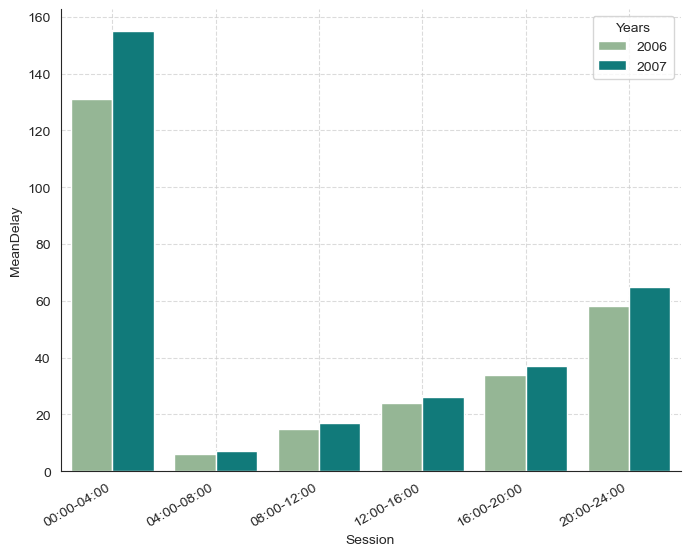

In [17]:
#Creating a barplot for visualisation
sns.set_style("white")
colors = ['darkseagreen', 'darkcyan']
plt.figure(figsize=(8, 6))
sns.barplot(data=df0607, x='Session', y='MeanDelay', hue='level_0', palette=colors)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Years', loc='upper right')
sns.despine() 
plt.grid(axis='y', linestyle='--', alpha=0.7) #Adding grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

We can see a similar trend when pinpointing the best time of the day to minimise delays for both years.
It's evident that the morning (4am - 12pm) is the best time of the day

---

# What are the best days of the week to minimise delays each year?

In [18]:
#Creating a dataframe to analyse the mean total delay for each day of the week for the year 2006.
AvgDelay_day06=df_2006[['DayOfWeek','TotalDelayTime']].groupby(['DayOfWeek']).mean().reset_index(drop=False) 
AvgDelay_day06.rename(columns={'TotalDelayTime': 'MeanTotalDelay'}, inplace=True)
AvgDelay_day06.reset_index()
AvgDelay_day06

,DayOfWeek,MeanTotalDelay
0,1,25.778788
1,2,21.317410
2,3,23.764386
3,4,29.341520
4,5,31.059315
5,6,21.175927
6,7,25.183754


In [19]:
#Converting the numerical values in the 'DayOfWeek' column into the corresponding days of the week
#Assumption: Week starts from Monday 
AvgDelay_day06['DayOfWeek'] = AvgDelay_day06['DayOfWeek'].replace({1: 'Monday',2: 'Tuesday',\
                                                                   3: 'Wednesday',4: 'Thursday',\
                                                                   5: 'Friday',6: 'Saturday',\
                                                                   7: 'Sunday'})
AvgDelay_day06

,DayOfWeek,MeanTotalDelay
0,Monday,25.778788
1,Tuesday,21.317410
2,Wednesday,23.764386
3,Thursday,29.341520
4,Friday,31.059315
5,Saturday,21.175927
6,Sunday,25.183754


Saturday has the mean total delay for the year 2006

Best days to minimise delays are ranked in the order; Saturday, Tuesday, Wednesday, Sunday, Monday, Thursday and Friday.

In [20]:
#Creating a dataframe to analyse the mean total delay for each day of the week for the year 2006.
AvgDelay_day07=df_2007[['DayOfWeek','TotalDelayTime']].groupby(['DayOfWeek']).mean().reset_index(drop=False) 
AvgDelay_day07.rename(columns={'TotalDelayTime': 'MeanTotalDelay'}, inplace=True)
AvgDelay_day07.reset_index()
AvgDelay_day07

,DayOfWeek,MeanTotalDelay
0,1,28.872758
1,2,24.909009
2,3,27.425946
3,4,31.577348
4,5,32.325424
5,6,22.649651
6,7,29.023042


In [21]:
#Converting the numerical values in the 'DayOfWeek' column into the corresponding days of the week
#Assumption: Week starts from Sunday
AvgDelay_day07['DayOfWeek'] = AvgDelay_day07['DayOfWeek'].replace({1: 'Monday',2: 'Tuesday',\
                                                                   3: 'Wednesday',4: 'Thursday',\
                                                                   5: 'Friday',6: 'Saturday',\
                                                                   7: 'Sunday'})
AvgDelay_day07

,DayOfWeek,MeanTotalDelay
0,Monday,28.872758
1,Tuesday,24.909009
2,Wednesday,27.425946
3,Thursday,31.577348
4,Friday,32.325424
5,Saturday,22.649651
6,Sunday,29.023042


Saturday has lowest mean total delay for the year 2007.

Best days to minimise delays are ranked in the order; Saturday, Tuesday, Wednesday, Monday, Sunday, Thursday and Friday.

# Visualisation

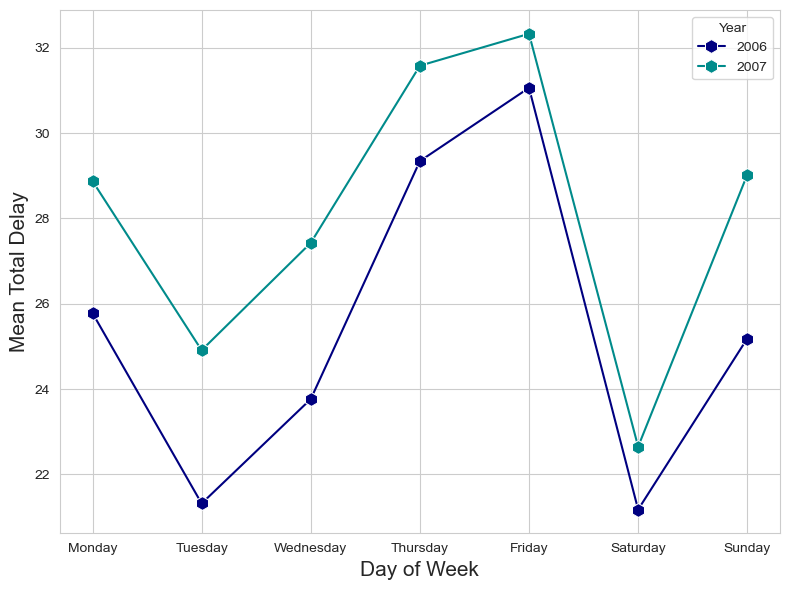

In [22]:
#Creating a lineplot for visualisation.
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid') 
L1 = sns.lineplot(data=AvgDelay_day06, x='DayOfWeek', y='MeanTotalDelay', \
                  marker='h', markersize=10, color='navy', label='2006')
L2 = sns.lineplot(data=AvgDelay_day07, x='DayOfWeek', y='MeanTotalDelay', \
             marker='h', markersize=10, color='darkcyan', label='2007')
plt.xlabel('Day of Week', fontsize = 15)
plt.ylabel('Mean Total Delay', fontsize = 15)
plt.tight_layout()
plt.legend(title='Year')
plt.show()

Eventhough there is a slight difference in the ranking, we are able to witness a pattern where Saturday and Tuesday are the best days of the week to minimise delays for both years.

 It's evident that there is an increase in the mean total delay annually in this sample of data.

---